In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

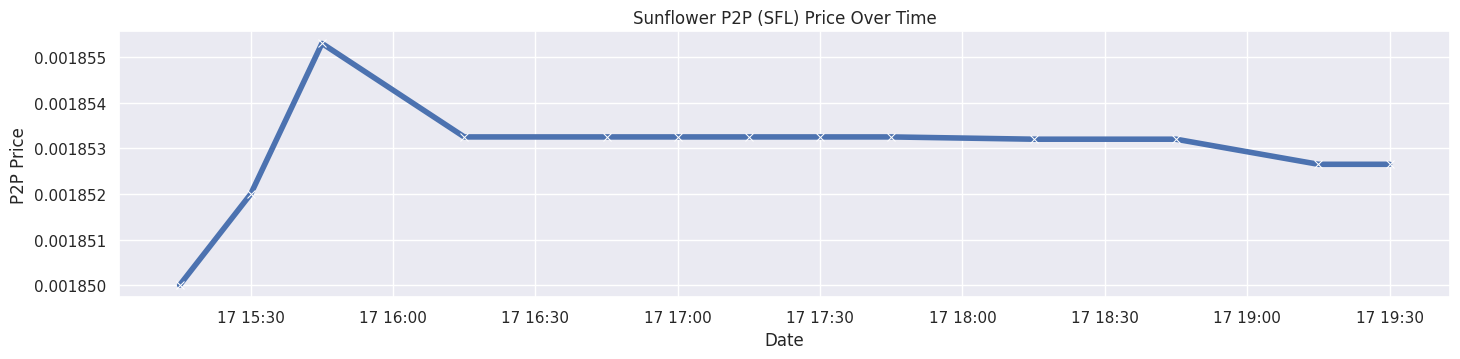

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

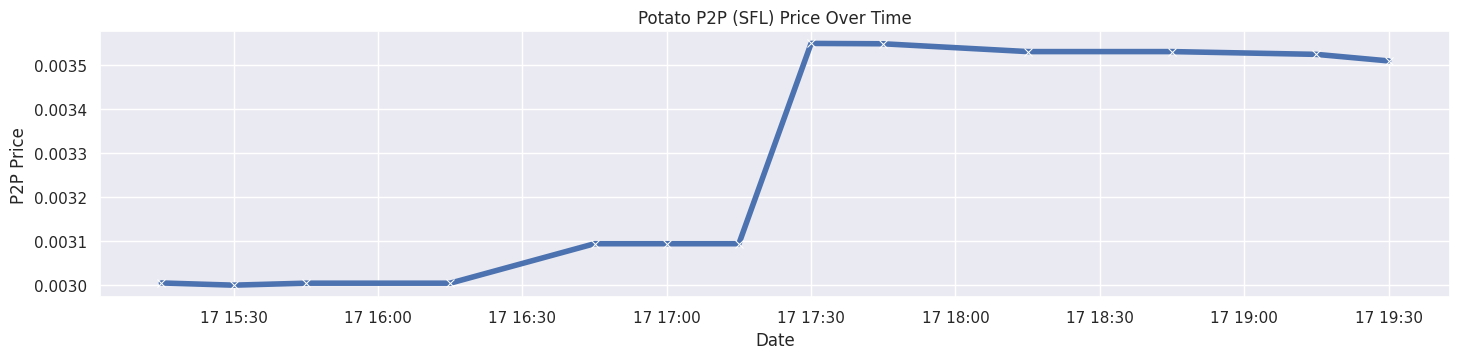

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

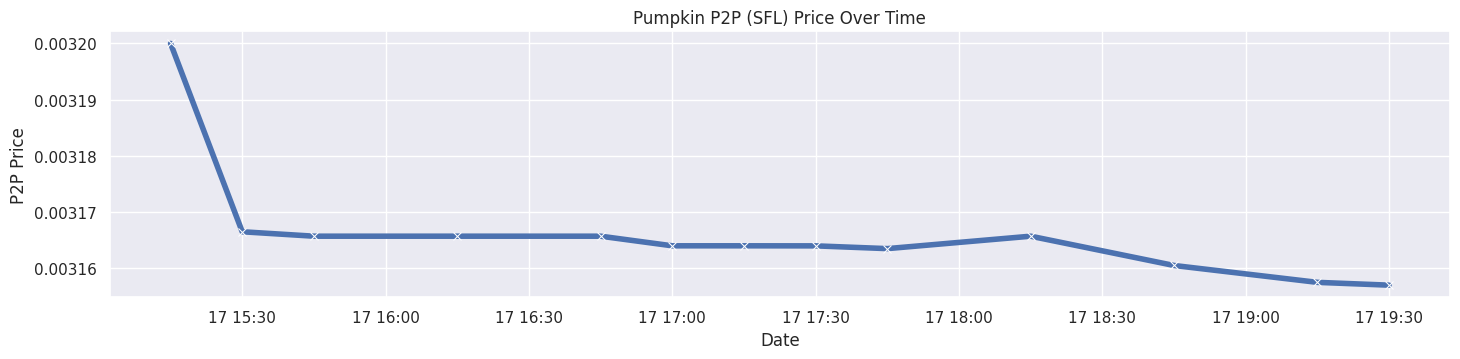

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

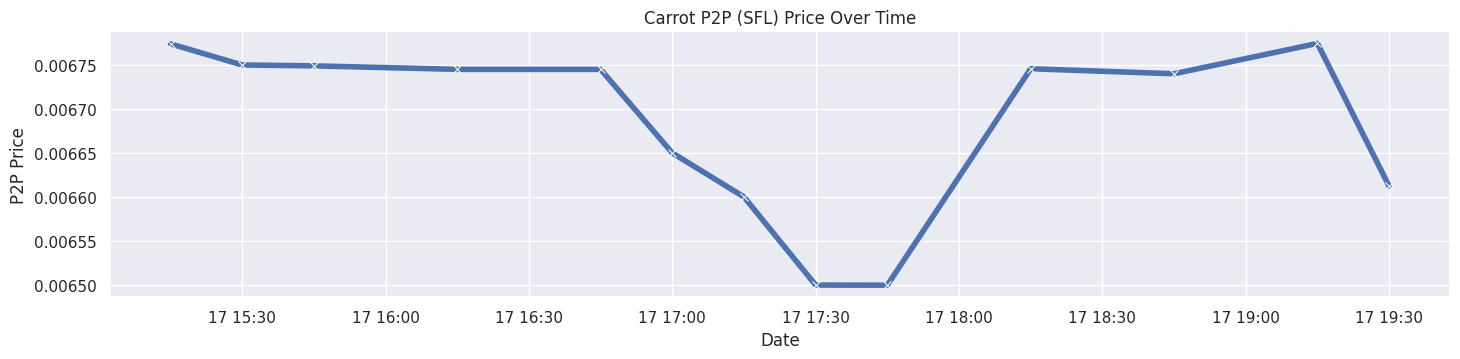

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

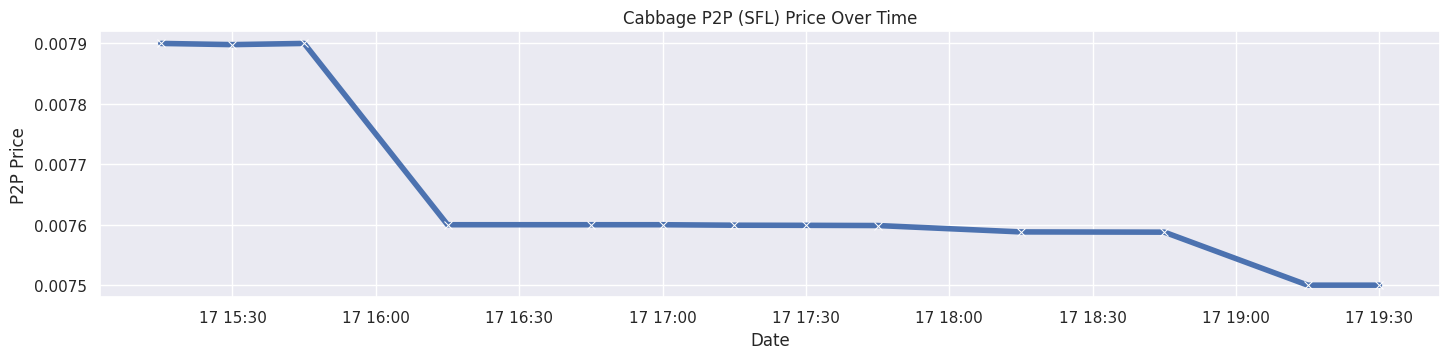

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

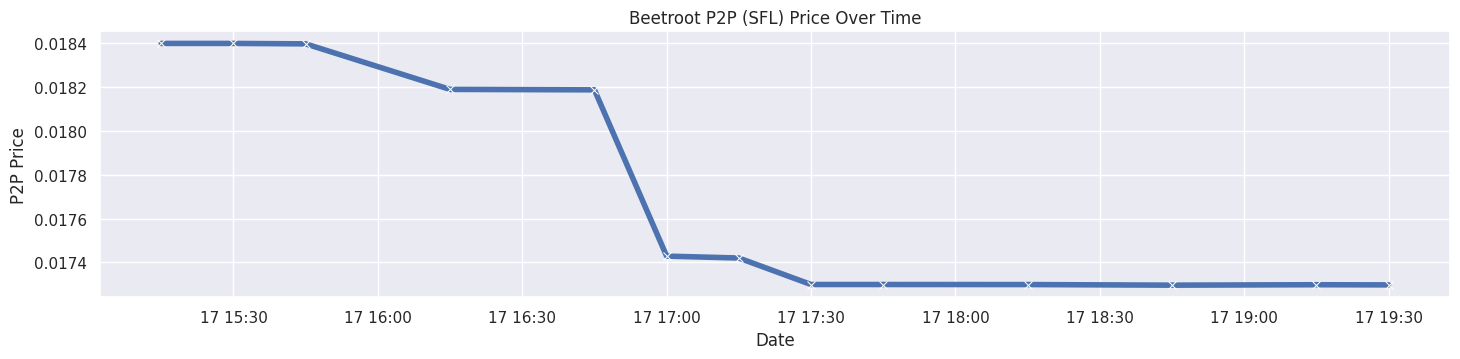

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

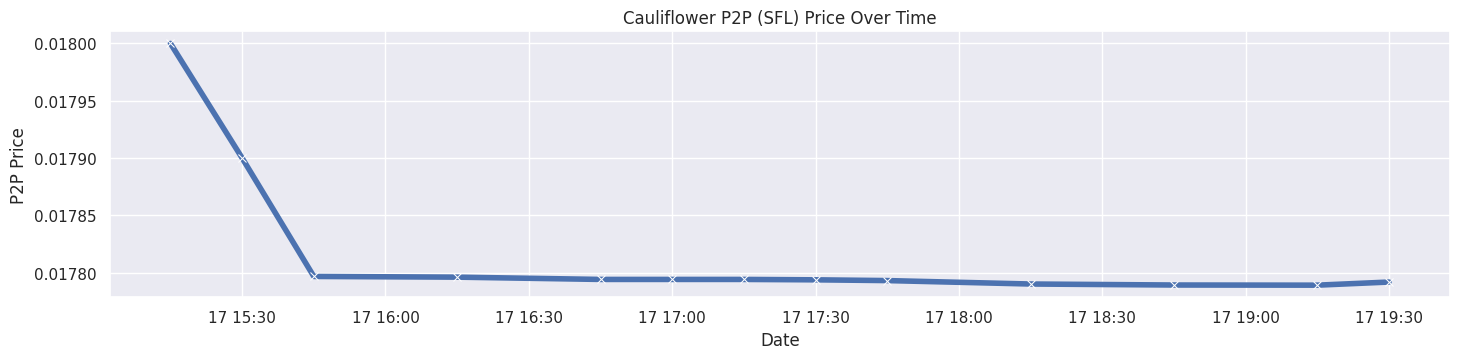

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

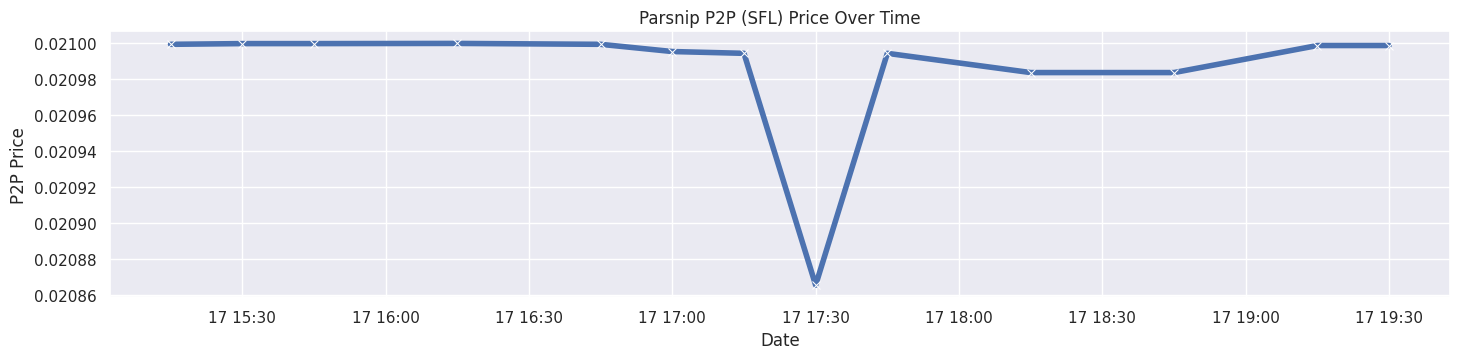

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

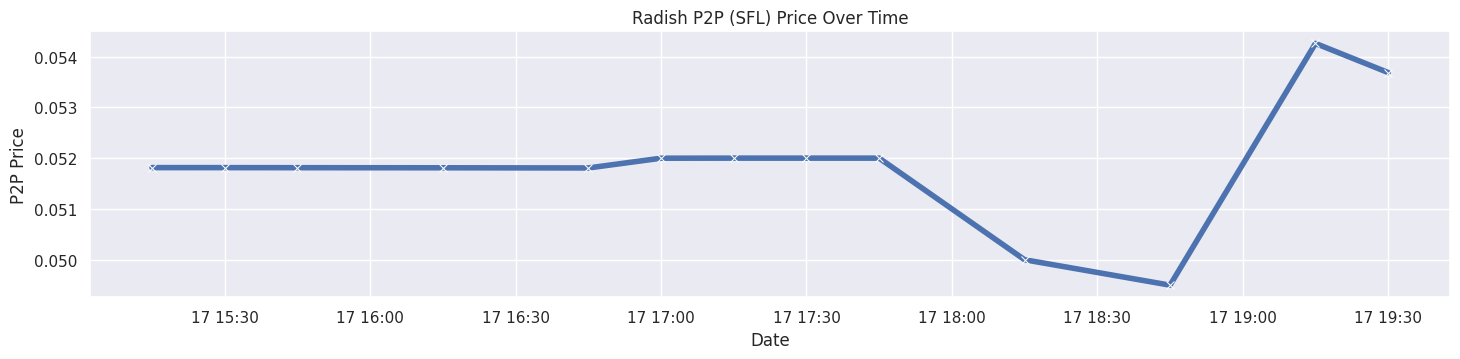

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

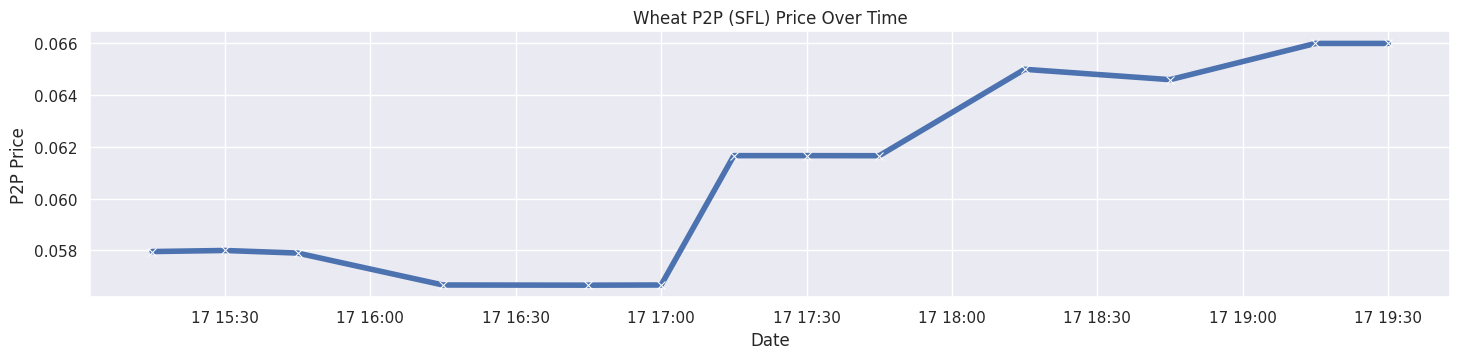

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

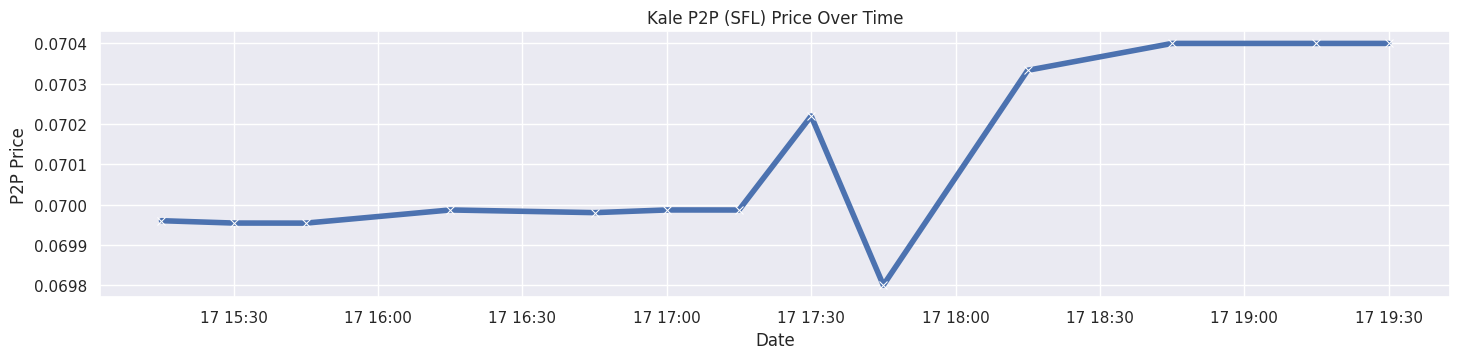

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

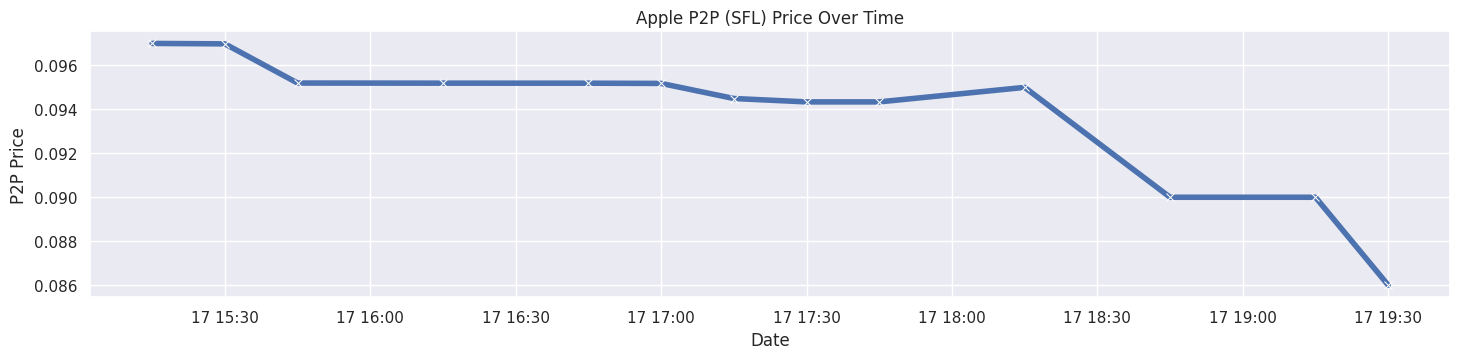

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

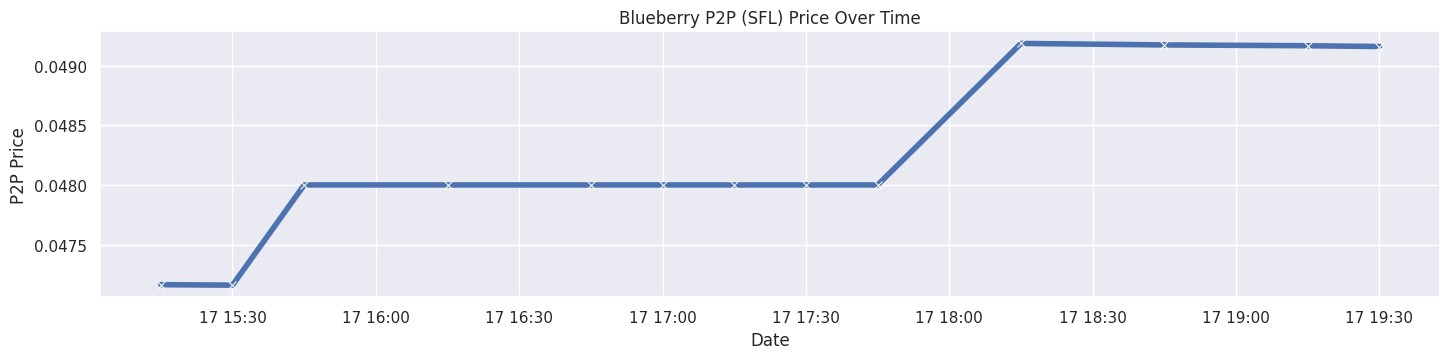

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

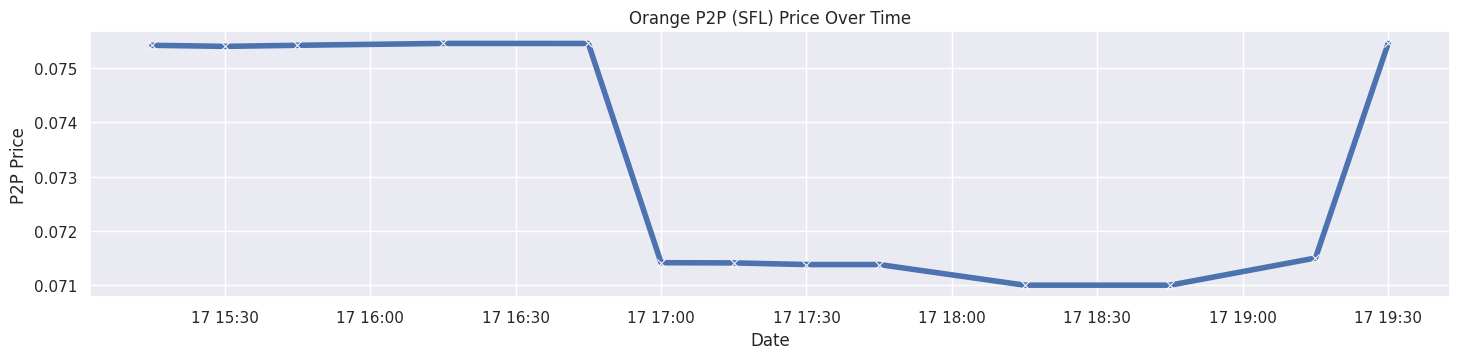

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

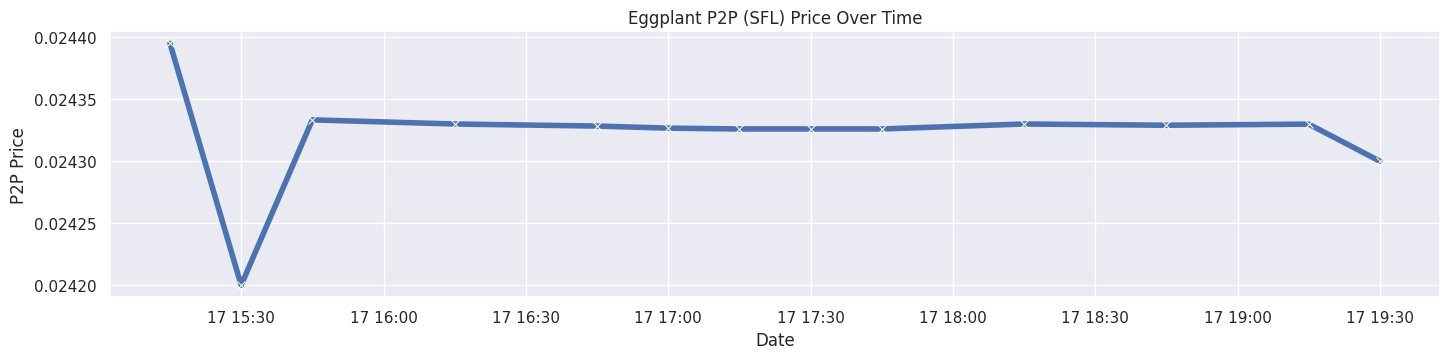

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

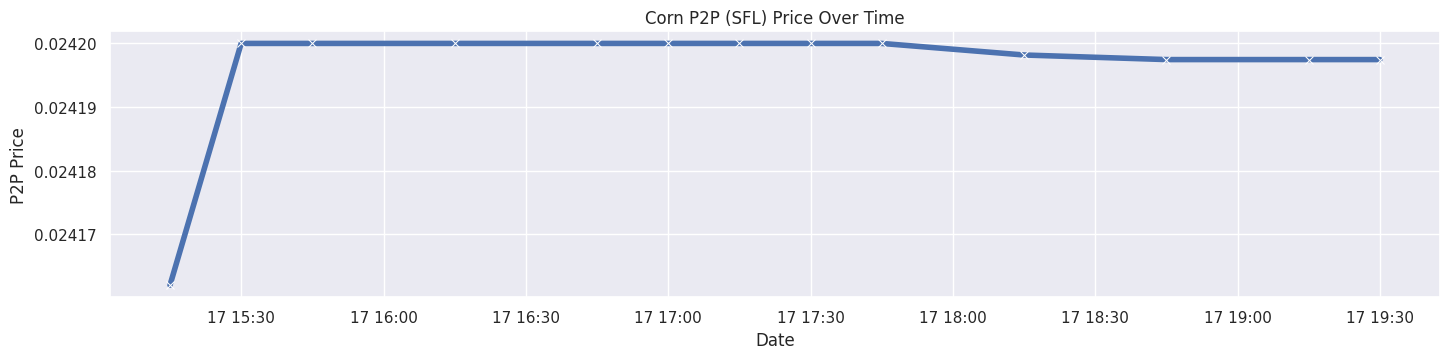

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

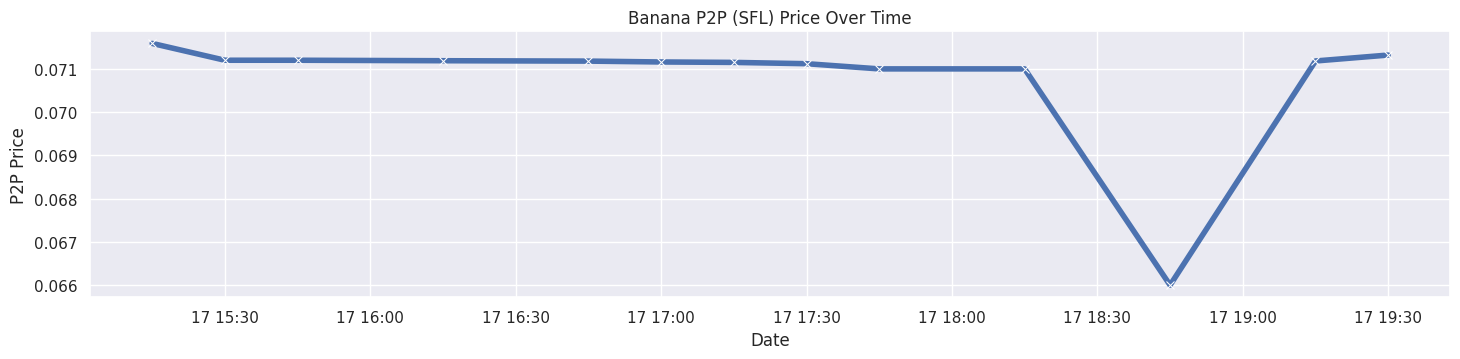

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

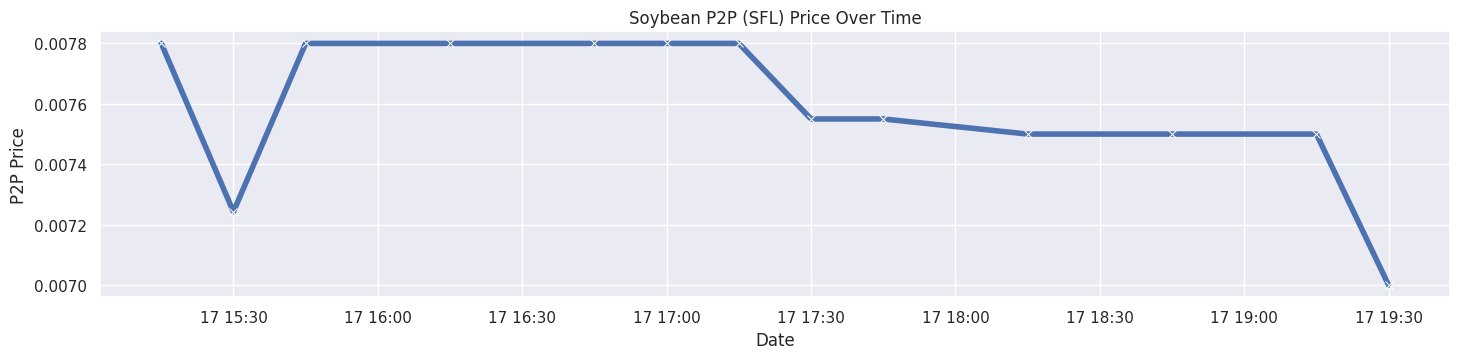

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

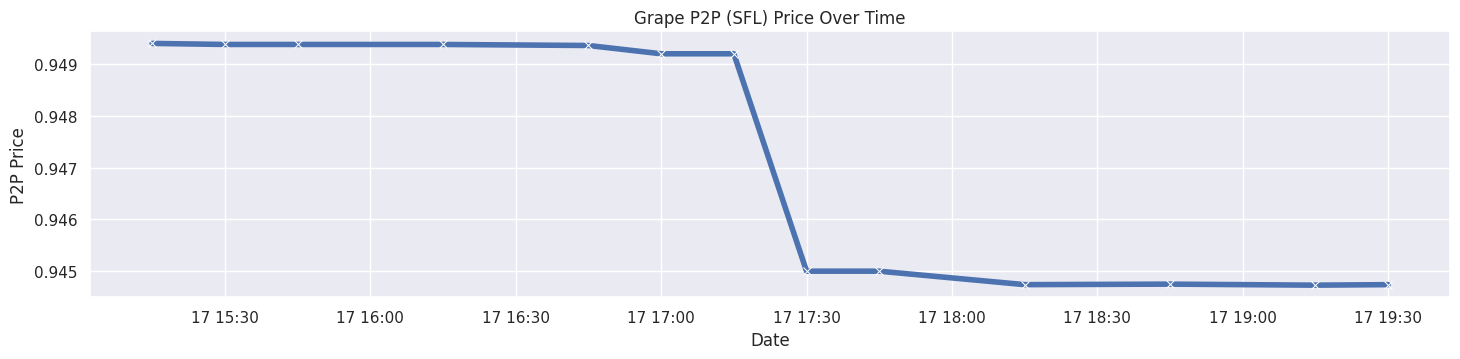

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

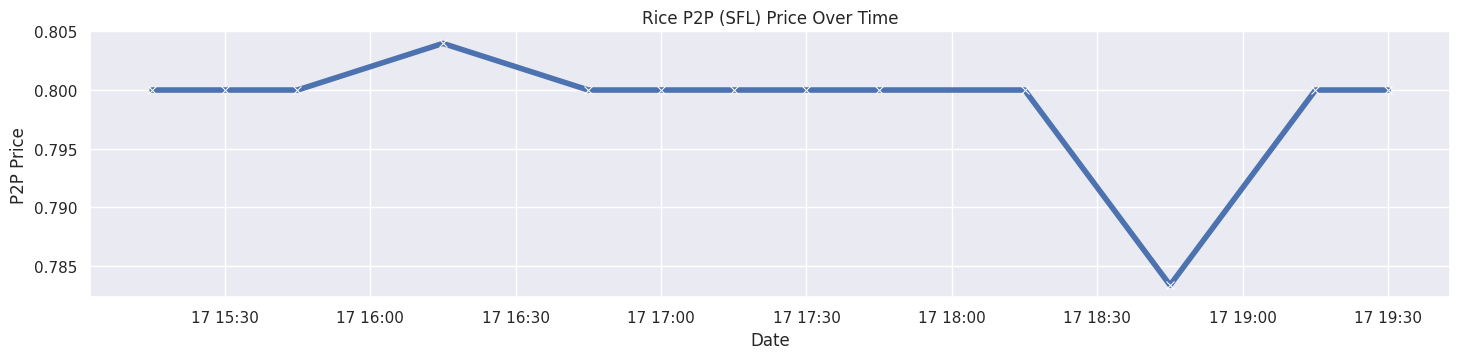

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

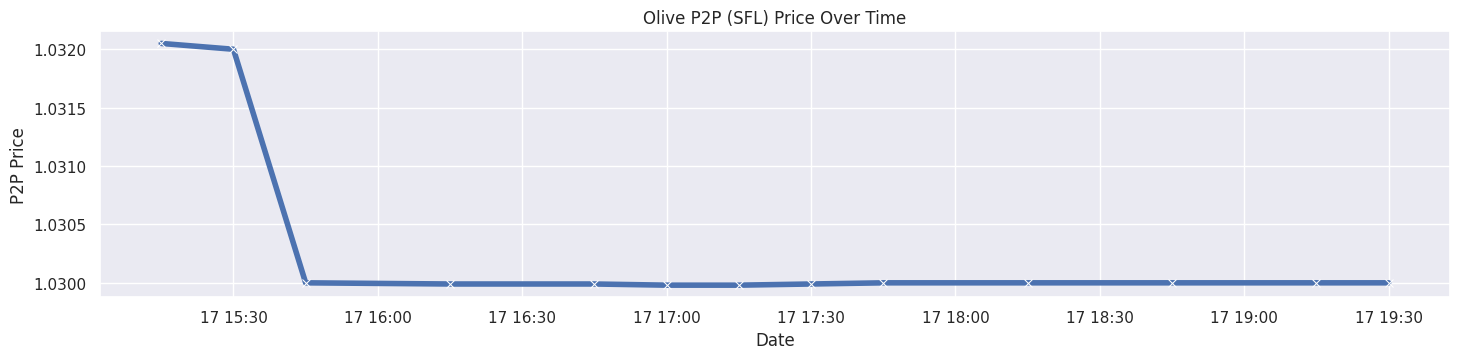

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

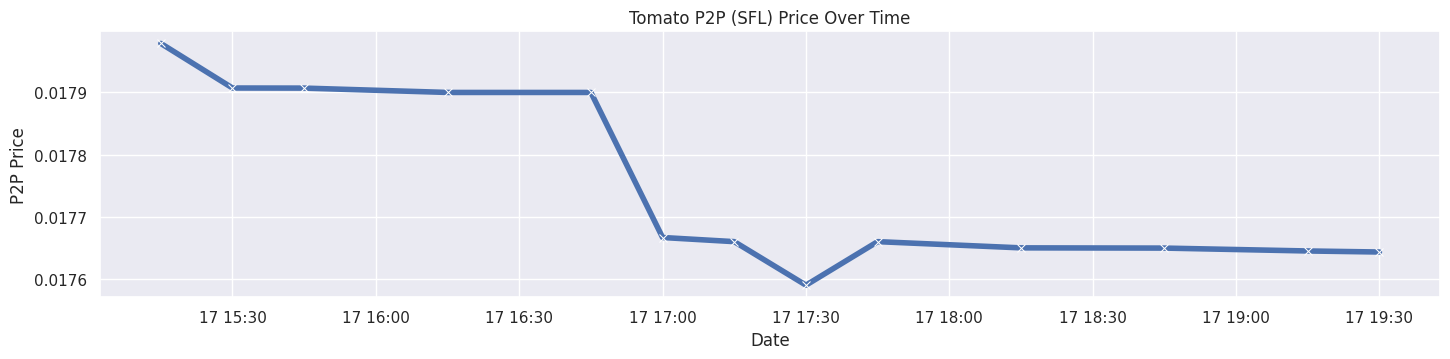

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

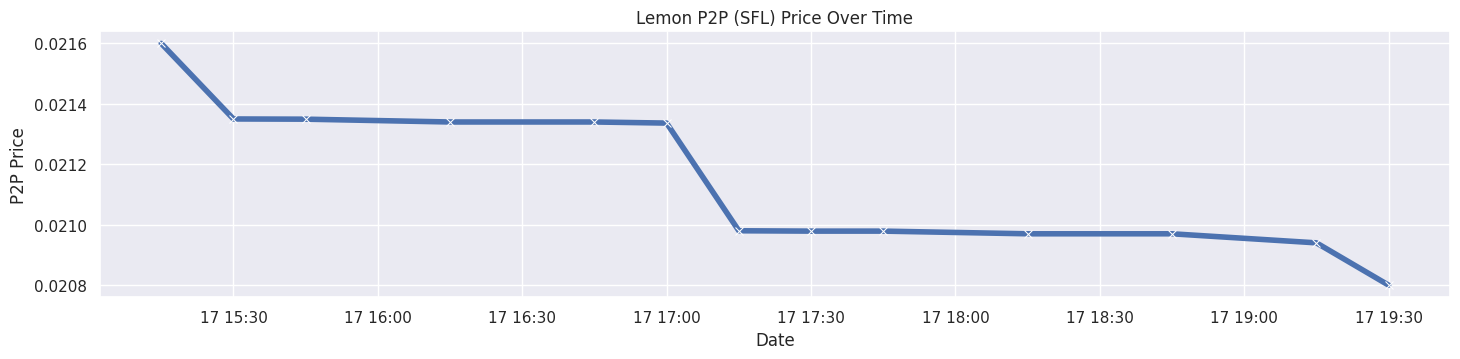

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

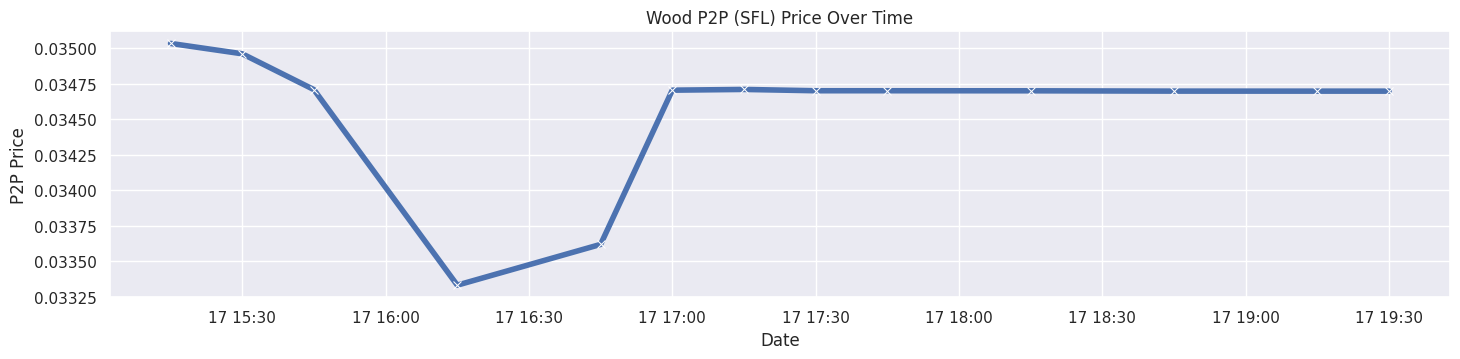

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

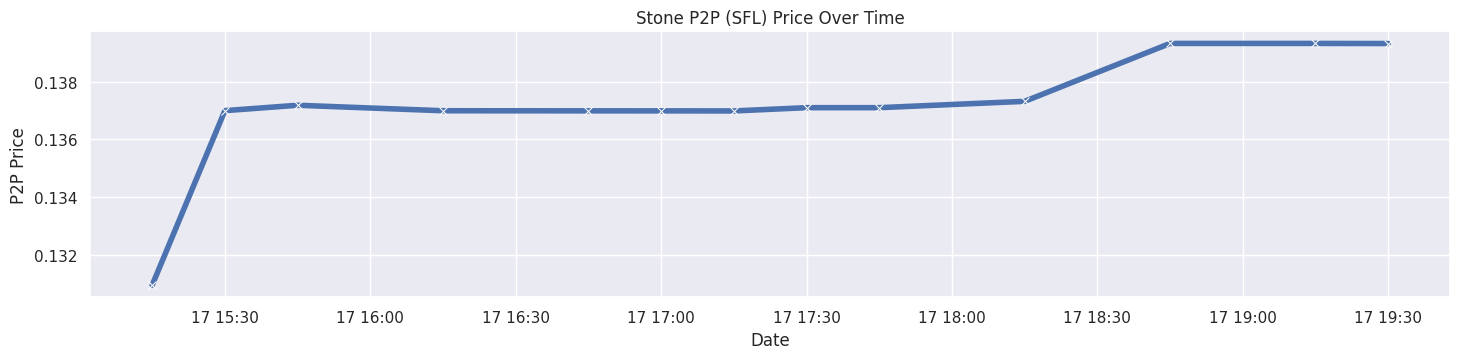

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

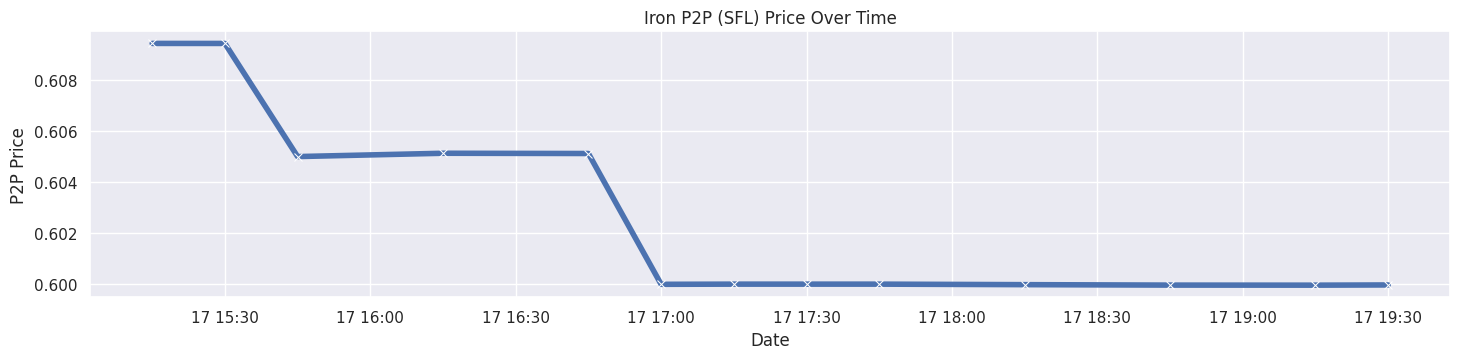

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

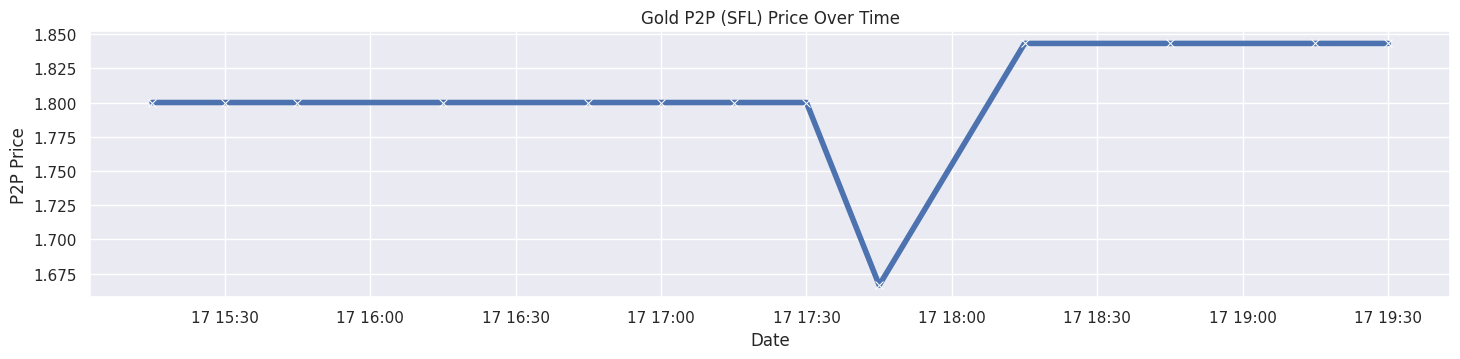

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

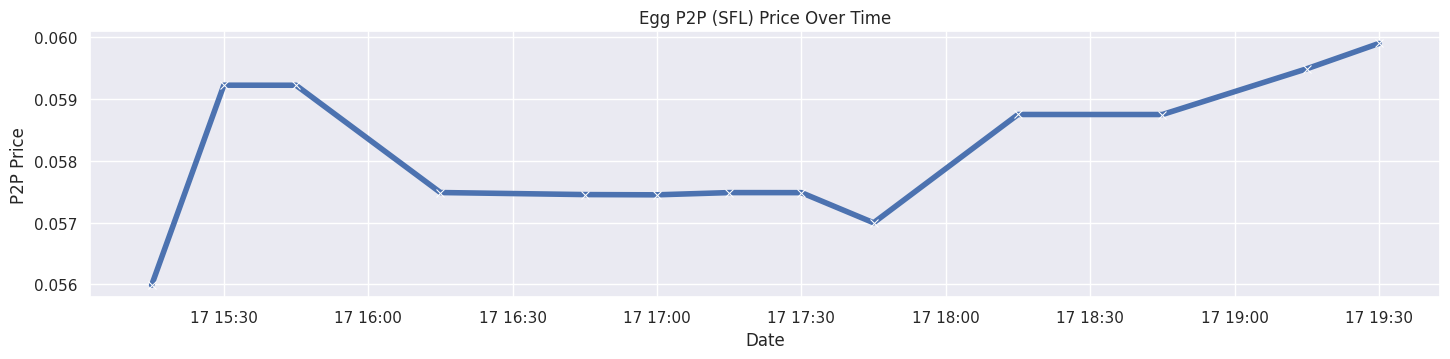

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

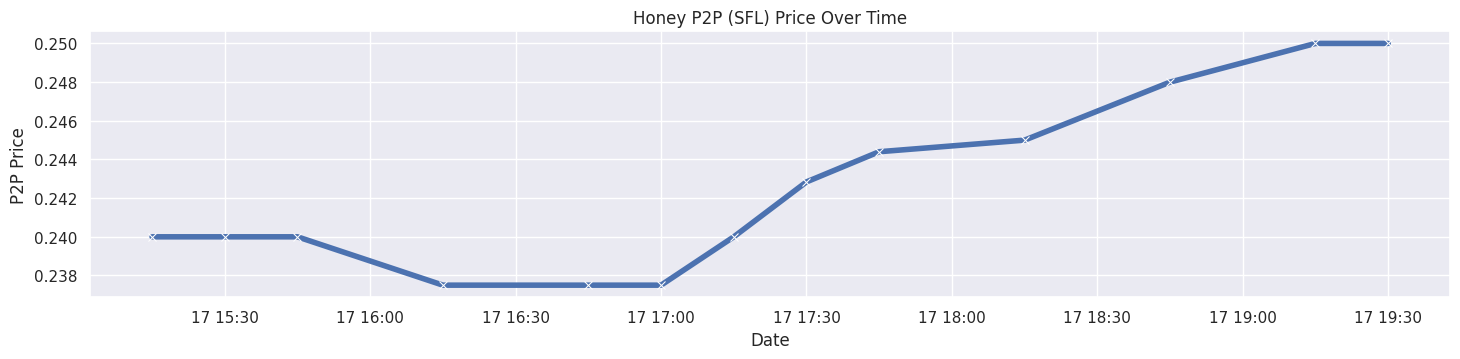

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

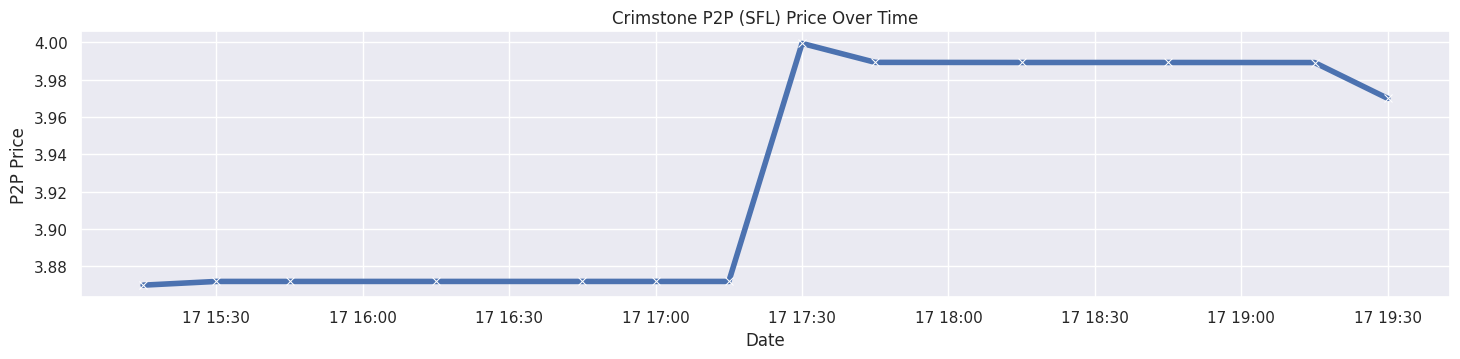

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

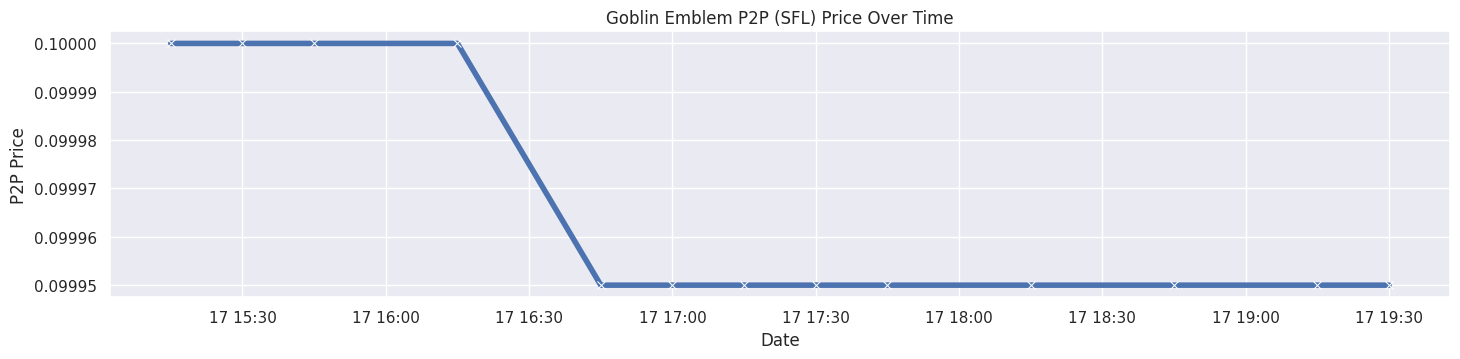

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

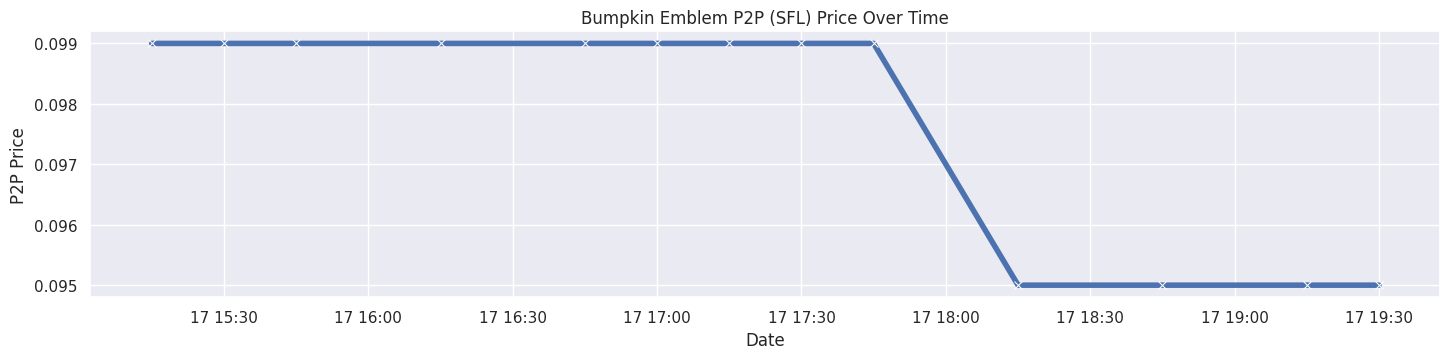

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

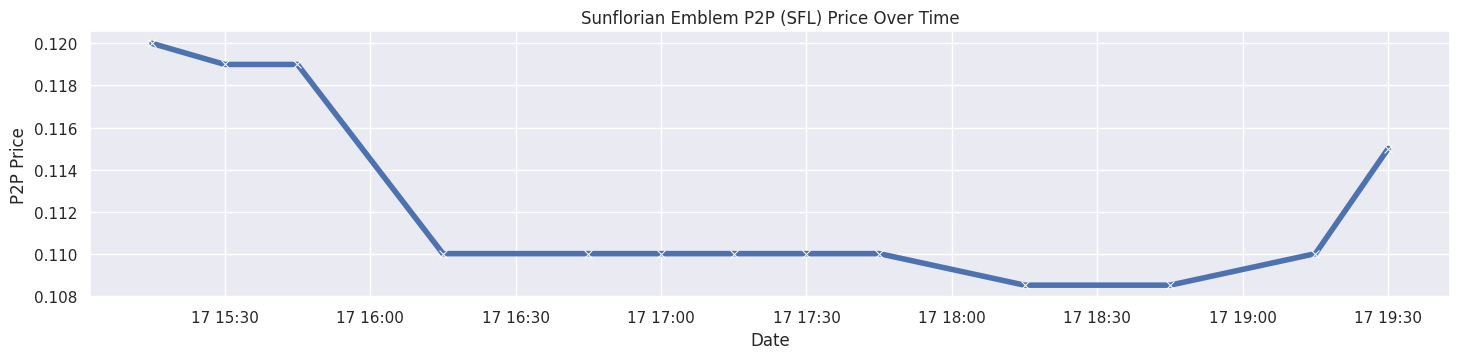

findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys' not found.
findfont: Font family 'Fixedsys'

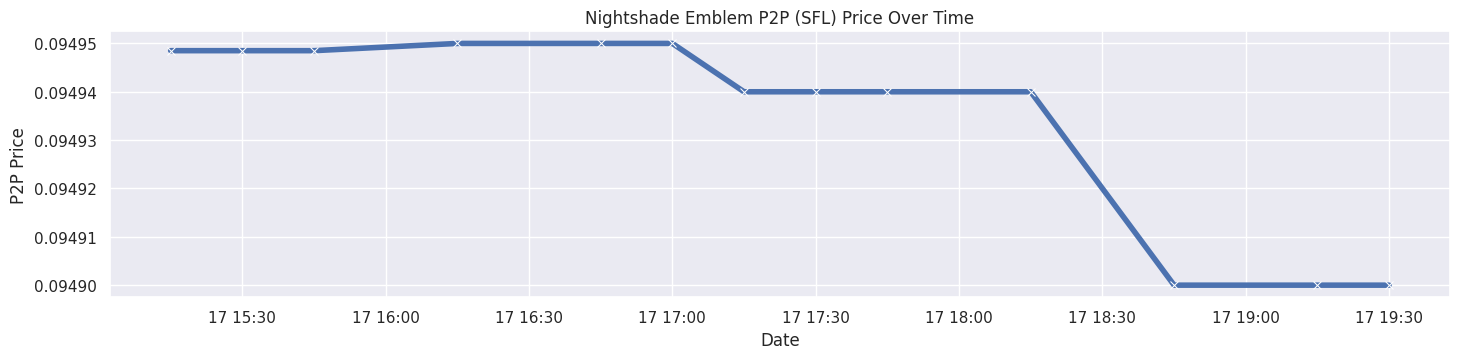

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load the CSV data (replace with your actual file path)
csv_file = 'price_tracking/resource_prices_2024_10.csv'  # Update this path to the location of your CSV
df = pd.read_csv(csv_file)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Seaborn style for better aesthetics
sns.set(style='darkgrid')

# Set the font for all plots
rcParams['font.family'] = 'Consolas'
rcParams['font.size'] = 20

# Create a function to plot each resource separately
def plot_each_resource_separately():
    unique_resources = df['Resource'].unique()
    
    # Loop through each resource and plot its price separately
    for resource in unique_resources:
        plt.figure(figsize=(15, 4))
        
        # Filter data for the current resource
        resource_data = df[df['Resource'] == resource]
        
        # Plot
        sns.lineplot(data=resource_data, x='Date', y='P2P (SFL)', marker='x', linewidth=4)
        
        # Add labels and title
        plt.ylabel('P2P Price')
        plt.title(f'{resource} P2P (SFL) Price Over Time')
        
        # Customize the appearance
        plt.tight_layout()
        
        # Show the plot for this resource
        plt.show()

# Call the function to plot each resource on a separate plot
plot_each_resource_separately()
